### One component mixture, 2D, independent variables

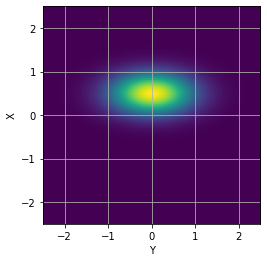

In [1]:
import sys
if "spnhelp" in sys.modules.keys():
    del sys.modules["spnhelp"]
import spnhelp
from spn.structure.leaves.parametric.Parametric import Gaussian, Uniform
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from spn.algorithms.Inference import likelihood

spn = Gaussian(mean=0.5, stdev=0.333, scope=0) * Gaussian(mean=0, stdev=0.66, scope=1)

info = spnhelp.get_pdf_grid_values(spn, (5, 5), np.array([0, 0]), 100)
ax = spnhelp.show_data(info);
ax.grid(True)

### 2 component mixture with sampling

array([[3.11801386, 0.20102325],
       [0.20102325, 0.75880968]])

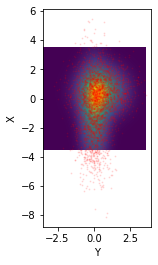

In [2]:
bump1 = Gaussian(mean=-1, stdev=2, scope=0) * Gaussian(mean=0, stdev=0.6, scope=1)
bump2 = Gaussian(mean=0.5, stdev=1, scope=0) * Gaussian(mean=0.5, stdev=1, scope=1)
spn = 0.5 * bump1 + 0.5 * bump2

info = spnhelp.get_pdf_grid_values(spn, (7, 7), np.array([0, 0]), 100)
spnhelp.show_data(info)


samples = spnhelp.sample_from_spn(spn, 4000)
plt.scatter(samples[:, 1], samples[:, 0], s=1, alpha=0.1, c = "red")

np.cov(samples, rowvar=False)

### Testing uniform density

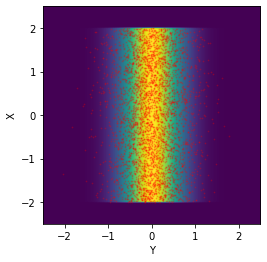

In [3]:
spn = Uniform(start=-2, end=2, scope=0) * Gaussian(mean=0, stdev=0.5, scope=1)
spn2 = Uniform(start=-2, end=2, scope=0) * Gaussian(mean=0, stdev=0.5, scope=1)
mix = 0.5 * spn + 0.5 * spn2
info = spnhelp.get_pdf_grid_values(mix, (5, 5), np.array([0, 0]), 100)
spnhelp.show_data(info)
samples = spnhelp.sample_from_spn(mix, 4000)
plt.scatter(samples[:, 1], samples[:, 0], s=1, alpha=0.2, c = "red");

### Approximating 1d gaussian with uniforms, splitting evenly spaced

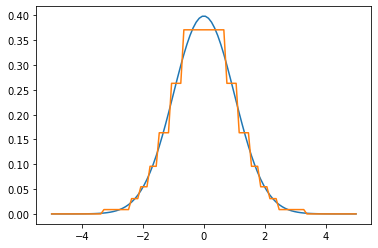

In [4]:


sd = 1
mean = 0

x = np.linspace(-5, 5, 100)

spn = spnhelp.gauss_to_spn_discretize(mean, sd, 1, 0, spnhelp.split_until_at_most_eps_wide)

plt.plot(x, stats.norm.pdf(x, loc=mean, scale=sd))
plt.plot(x, likelihood(spn, x.reshape(-1, 1)));

### Approximating 1d gaussian with uniforms, adaptive splitting

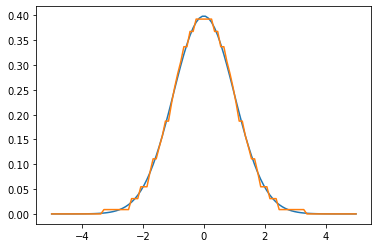

In [5]:
  
spn = spnhelp.gauss_to_spn_discretize(mean, sd, 0.02, 0, spnhelp.split_until_bounded_likelihood)

plt.plot(x, stats.norm.pdf(mean + sd * x))
plt.plot(x, likelihood(spn, x.reshape(-1, 1)));

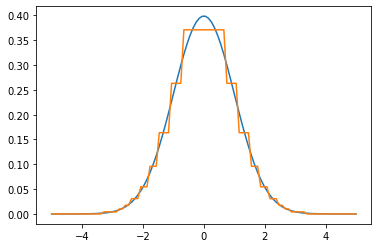

In [6]:
  
spn = spnhelp.gauss_to_spn_discretize(mean, sd, 1, 0, spnhelp.split_until_bounded_log_likelihood)

plt.plot(x, stats.norm.pdf(mean + sd * x))
plt.plot(x, likelihood(spn, x.reshape(-1, 1)));

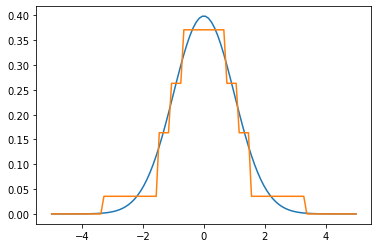

In [7]:
  
spn = spnhelp.gauss_to_spn_discretize(0, 1, 0.1, 0, spnhelp.split_until_bounded_likelihood)

plt.plot(x, stats.norm.pdf(0 + 1 * x))
plt.plot(x, likelihood(spn, x.reshape(-1, 1)));

### Approximating 1d gaussian with even spacing in output space

In [8]:
# gaussian pdf inverse, maps density to x position
def i_pdf(x : float, loc : float, scale : float) -> float:
    return loc - np.sqrt(-np.log(2*x*x*np.pi*scale*scale)*scale*scale)


xs = np.linspace(-0.5, 0.5, 10)
print([i_pdf(stats.norm.pdf(x, mean, sd), mean, sd) for x in xs])
# plt.plot(xs, [i_pdf(norm.pdf(x, mean, sd), mean, sd) for x in xs])

[-0.49999999999999967, -0.38888888888888856, -0.2777777777777779, -0.16666666666666544, -0.05555555555555333, -0.05555555555555333, -0.16666666666666544, -0.27777777777777724, -0.38888888888888856, -0.49999999999999967]


### Comparing the approximations visually

uniform, likelihood, log_likelihood


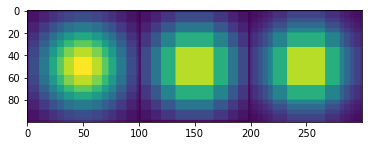

In [9]:
mean = 0
sd = 1.3
eps = 0.5
uniform_spn = spnhelp.gauss_to_spn_discretize(mean, sd, eps, 0, spnhelp.split_until_at_most_eps_wide) * spnhelp.gauss_to_spn_discretize(mean, sd, eps, 1, spnhelp.split_until_at_most_eps_wide)
eps = 0.05
likelihood_spn = spnhelp.gauss_to_spn_discretize(mean, sd, eps, 0, spnhelp.split_until_bounded_likelihood) * spnhelp.gauss_to_spn_discretize(mean, sd, eps, 1, spnhelp.split_until_bounded_likelihood)
eps = 0.25
log_likelihood_spn = spnhelp.gauss_to_spn_discretize(mean, sd, eps, 0, spnhelp.split_until_bounded_log_likelihood) * spnhelp.gauss_to_spn_discretize(mean, sd, eps, 1, spnhelp.split_until_bounded_log_likelihood)


vals, _, _ = spnhelp.get_pdf_grid_values(uniform_spn, (5, 5), np.array([0, 0]), 100)
vals2, _, _ = spnhelp.get_pdf_grid_values(likelihood_spn, (5, 5), np.array([0, 0]), 100)
vals3, _, _ = spnhelp.get_pdf_grid_values(log_likelihood_spn, (5, 5), np.array([0, 0]), 100)

plt.imshow(np.c_[vals, vals2, vals3]);
print("uniform, likelihood, log_likelihood")

### Computing Expectations (had to implement uniform moments)

In [11]:
from spn.algorithms.stats.Moments import Moment, get_variance, get_mean

print (get_mean(uniform_spn)) # mean
print (get_variance(uniform_spn)) # variance

[[1.82145965e-16 1.82145965e-16]]
[[1.69641893 1.69641893]]
